<a href="https://colab.research.google.com/github/btatsis/OSM/blob/master/REINVENT_AZ_OSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uninstall torch v1.2.0 and other related modules
!pip uninstall torch torchvision torchsummary torchtext -y
# install conda
!wget https://repo.continuum.io/miniconda/Miniconda3-4.4.10-Linux-x86_64.sh
!chmod 770 ./Miniconda3-4.4.10-Linux-x86_64.sh
!time bash ./Miniconda3-4.4.10-Linux-x86_64.sh -b -f -p /usr/local
!export PYTHONPATH="/usr/local"
# install needed modules
!conda install -c pytorch -c defaults -c rdkit -y python=3.6 rdkit=2019.03.4 \
    pytorch=1.1 tqdm=4.19.4 joblib git gitpython=2.1.3
# git clone
!git clone https://github.com/yamasakih/reinvent.git

Uninstalling torch-1.3.1:
  Successfully uninstalled torch-1.3.1
Uninstalling torchvision-0.4.2:
  Successfully uninstalled torchvision-0.4.2
Uninstalling torchsummary-1.5.1:
  Successfully uninstalled torchsummary-1.5.1
Uninstalling torchtext-0.3.1:
  Successfully uninstalled torchtext-0.3.1
--2019-11-24 15:40:38--  https://repo.continuum.io/miniconda/Miniconda3-4.4.10-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58304693 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.4.10-Linux-x86_64.sh’

Miniconda3-4.4.10-L 100%[===================>]  55.60M  17.5MB/s    in 3.9s    

2019-11-24 15:40:43 (14.4 MB/s) - ‘Miniconda3-4.4.10-Linux-x86_64.sh’ saved [58304693/58304693]

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-

In [2]:
# check installed module versions
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
from rdkit import rdBase
print(rdBase.rdkitVersion)
import torch
print(torch.__version__)

2019.03.4
1.1.0


In [0]:
# change directory
import os
os.chdir('./reinvent')

In [4]:
# generate agent
!time python reinforce_model.py --scoring-function tanimoto --steps 500 \
  --query-smi 'FC(F)OC(C=C1)=CC=C1C2=NN=C3C=NC=C(OCC(CO)C4=CC(C(F)(F)F)=CC=C4)N32' \
  --name 'OSM-LO-6' --resultdir 'result'

15:57:21: model.load_from_file +120: WARNING  Trying to load a model saved with version 0.1 on version 0.2. The model will be updated when saved
15:57:21: model.load_from_file +120: WARNING  Trying to load a model saved with version 0.1 on version 0.2. The model will be updated when saved
[15:57:22] SMILES Parse Error: extra close parentheses while parsing: Cn1cc(-c2ccc(Cn3cc(N4CCC(C(=O)NCc5ccc(F)c(F)c6)CC5)c(N)n4)cc3)cc2)cn1
[15:57:22] 

****
Pre-condition Violation
no atoms
Violation occurred on line 173 in file /opt/conda/conda-bld/rdkit_1565675972125/work/Code/GraphMol/ROMol.cpp
Failed Expression: getNumAtoms() > 0
****

[15:57:22] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 12 13 14 28 29 34 35 36 37

[15:57:22] SMILES Parse Error: extra open parentheses for input: 'CC1NC(=O)C(C)NC(=O)C(C)NC(=O)C(C(C(CC(=O)O)NC(=O)C(Cc2ccccc2)NC(=O)C2Cc3ccccc3C(=O)C2O)SC1=S'
[15:57:22] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

[15:57:22] SMILES Parse Erro

In [0]:
# generate 50 molecules
!python sample_from_model.py --save-smiles generated_smiles.smi --number 50 \
    --model result/Agent.ckpt

In [6]:
!cat generated_smiles.smi

COc1ccc(-c2cncc(C#N)c2-c2ccc(C(F)(F)F)cc2OCCOCCO)cc1
Cc1cccc(-c2nc(COc3ccc(C(F)(F)F)cc3)no2)c1
COc1ccc(-c2nccc(-c3ccncc3)n2)cc1
COc1cccc(-c2nc(C(F)(F)F)cn2-c2ccc(C(F)(F)F)cc2)c1
COc1ccc(-c2nnc(-c3ccccc3C(F)(F)F)o2)cc1
COc1ccc(-c2nnc(-c3ccccc3C(F)(F)F)o2)cc1
OCCOc1cccc(-c2noc(-c3ccccc3C(F)(F)F)n2)c1
COc1ccc(-c2nnc(SCc3ccccc3C(F)(F)F)o2)cc1
COc1cccc(-c2nc(-c3cccc(C(F)(F)F)c3)no2)c1
OCCOc1ccc(-c2cnncc2-c2cccc(C(F)(F)F)c2)cc1
COc1cccc(-c2cncc(-c3ccc(C(F)(F)F)cc3)n2)c1
CCOc1cccc(-c2nc(-c3ccc(C(F)(F)F)cc3)no2)c1
COc1ccc(-c2noc(-c3cccc(C(F)(F)F)c3)n2)cc1
OCCOc1cccc(-c2cnnc(-c3cccc(C(F)(F)F)c3)n2)c1
COCc1cncc(-c2ccc(-c3ccc(C(F)(F)F)cc3)cc2)c1
COc1cccc(-c2nccc(-c3ccc(C(F)(F)F)cc3)n2)c1
OCCOc1cccc(-c2cccc3c(-c4ccc(C(F)(F)F)cc4)cccc23)c1
NC(CO)c1cccc(-c2ccc(-c3ccc(C(F)(F)F)cc3)cc2)c1
CCOc1ccc(-c2cnncc2-c2ccc(OC)cc2)cc1
COc1ccc(-c2cccc(C(F)(F)F)c2)cc1
COc1cccc(-c2noc(C(O)c3cccc(C(F)(F)F)c3)n2)c1
CCSc1nc(-c2cccc(C(F)(F)F)c2)nc2cc(C(F)(F)F)ccc12
COc1cccc(-c2noc(-c3ncccc3COc3ccc(C(F)(F)F)cc3)n2)c1
CO

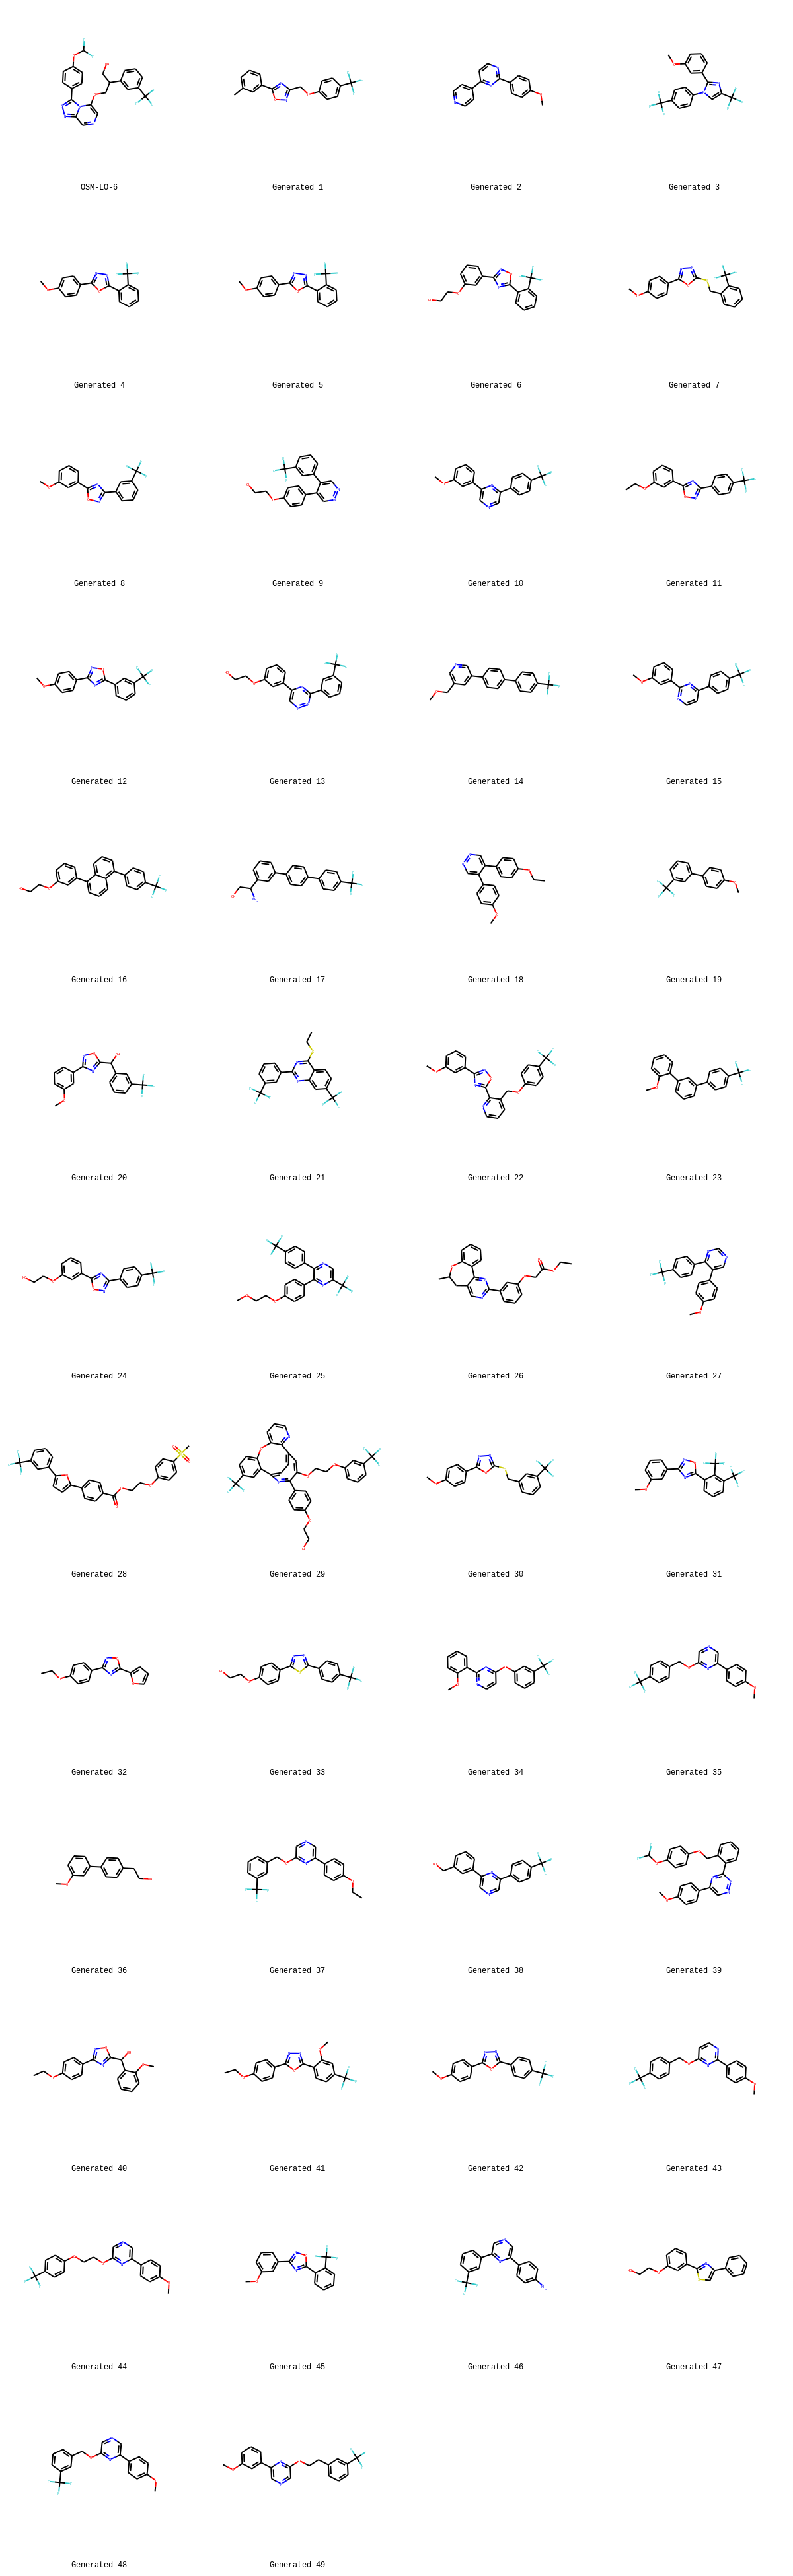

In [7]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
supp = Chem.SmilesMolSupplier('generated_smiles.smi')
_mols = [m for m in supp if m is not None]
osmLo6 = 'FC(F)OC(C=C1)=CC=C1C2=NN=C3C=NC=C(OCC(CO)C4=CC(C(F)(F)F)=CC=C4)N32'
mols = [Chem.MolFromSmiles(osmLo6)]
mols.extend(_mols)
legends = [f'Generated {i}' for i in range(len(mols))]
legends[0] = 'OSM-LO-6'
Draw.MolsToGridImage(
    mols, legends=legends, molsPerRow=4, subImgSize=(300, 300))